# Problem Statement

The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.


Objective:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

# 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

The dataset can be found at https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

## 1.1 Importing dataset

In [2]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [3]:
#Print first 5 rows of dataset
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Print last 5 rows of dataset
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [5]:
#To find shape of the dataset
df.shape

(5000, 14)

In [6]:
#To display columns in the dataset
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
#To display statistical summary
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#To check if there is any null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
#To display the datatypes
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# 2. Cleaning the dataset

From the statistical summary we found that experience column has some noisy data. Hence we have to clean that data.

In [11]:
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [12]:
#correlation between age and experience
experience = df['Experience']
age = df['Age']
print(experience.corr(age))

0.9942148569683271


We find that age and experience are very much correlated, so we can exclude experience column.

In [13]:
#dropping unwanted rows
df = df.drop(['Experience', 'ID'], axis = 1)

In [14]:
df.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


# 3. EDA - Exploratory Data Analysis

## 3.1

In [15]:
#no of unique in each column
df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [16]:
#Zip code is a nominal variable. So if we have to encode it, there will be 467 values , so we are dropping it.
df = df.drop(['ZIP Code'], axis=1)

## 3.2

In [17]:
#people with zero mortage value
print("People with mortage value 0 : {}".format(df['Mortgage'].value_counts()[0]))

People with mortage value 0 : 3462


## 3.3

In [18]:
#count of people with zero CCAvg(Average credit card spending)
print("People with zero credit card spending :  {}".format(df['CCAvg'].value_counts()[0]))

People with zero credit card spending :  106


## 3.4 Value counts of categorical variables

In [19]:
df['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [20]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [21]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [22]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [23]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [24]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [25]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

## 3.5

In [26]:
#Univariate Analysis

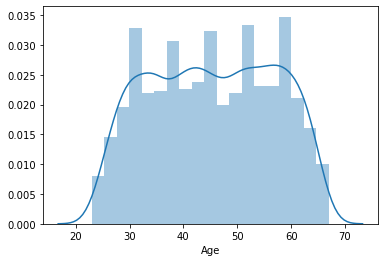

In [27]:
#Age seems to have a symmetric distribution
sns.distplot(df.Age)

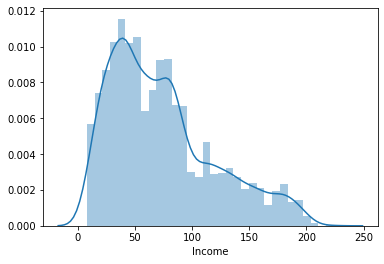

In [28]:
#Income is observed to be a right skewed distribution
sns.distplot(df.Income)

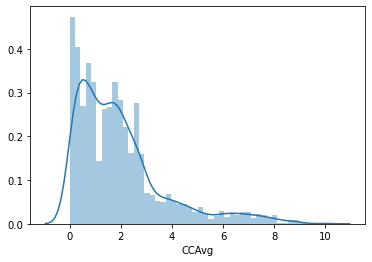

In [29]:
#CCAvg also seems to be a right skewed distribution
sns.distplot(df.CCAvg)

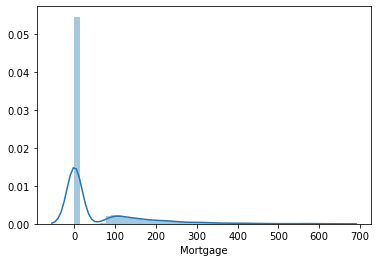

In [30]:
#MOrtgage also seems highly skewed
sns.distplot(df.Mortgage)

In [31]:
#Some histograms 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8693a52b0>]],
      dtype=object)

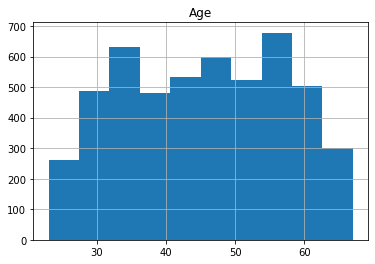

In [32]:
df.hist(column='Age')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd86931ba90>]],
      dtype=object)

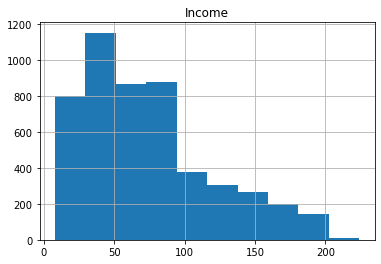

In [33]:
df.hist(column='Income')

In [34]:
#Categorical Variales

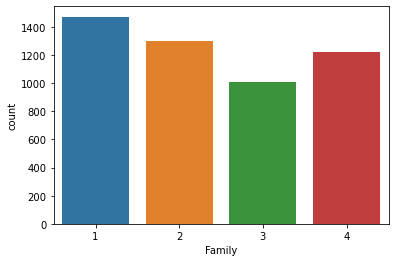

In [35]:
sns.countplot(x='Family',data=df)

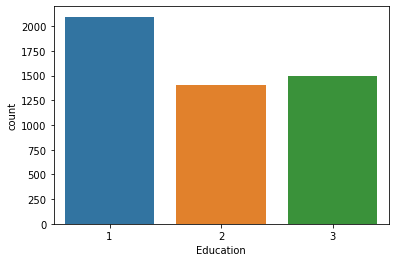

In [36]:
sns.countplot(x='Education',data=df)

In [37]:
#Multivariate Analysis

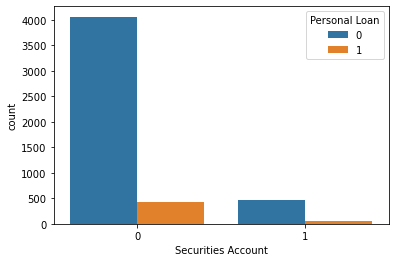

In [38]:
sns.countplot(x='Securities Account',data=df, hue='Personal Loan')

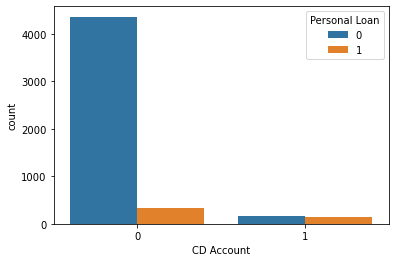

In [39]:
sns.countplot(x='CD Account',data=df, hue='Personal Loan')

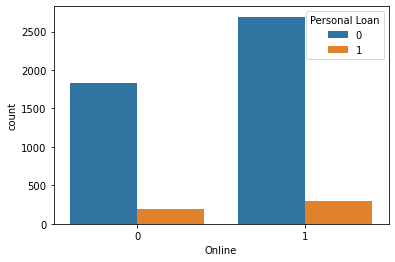

In [40]:
sns.countplot(x='Online',data=df, hue='Personal Loan')

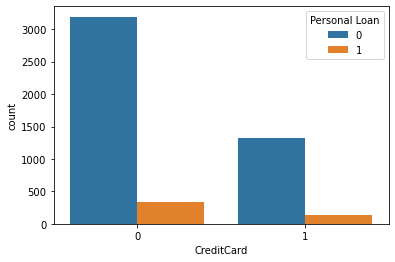

In [41]:
sns.countplot(x='CreditCard',data=df, hue='Personal Loan')

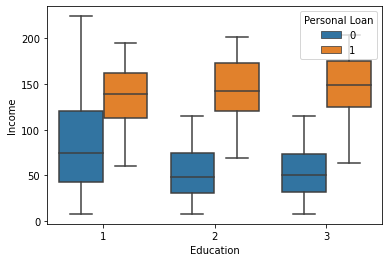

In [42]:
sns.boxplot(x = 'Education', y ='Income', hue='Personal Loan', data = df)

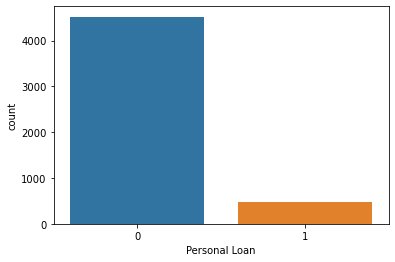

In [43]:
#Target Variable
sns.countplot(x='Personal Loan',data=df)

In [44]:
#Coorelation Matrix

                         Age    Income    Family     CCAvg  Education  \
Age                 1.000000 -0.055269 -0.046418 -0.052030   0.041334   
Income             -0.055269  1.000000 -0.157501  0.645993  -0.187524   
Family             -0.046418 -0.157501  1.000000 -0.109285   0.064929   
CCAvg              -0.052030  0.645993 -0.109285  1.000000  -0.136138   
Education           0.041334 -0.187524  0.064929 -0.136138   1.000000   
Mortgage           -0.012539  0.206806 -0.020445  0.109909  -0.033327   
Personal Loan      -0.007726  0.502462  0.061367  0.366891   0.136722   
Securities Account -0.000436 -0.002616  0.019994  0.015087  -0.010812   
CD Account          0.008043  0.169738  0.014110  0.136537   0.013934   
Online              0.013702  0.014206  0.010354 -0.003620  -0.015004   
CreditCard          0.007681 -0.002385  0.011588 -0.006686  -0.011014   

                    Mortgage  Personal Loan  Securities Account  CD Account  \
Age                -0.012539      -0.007726 

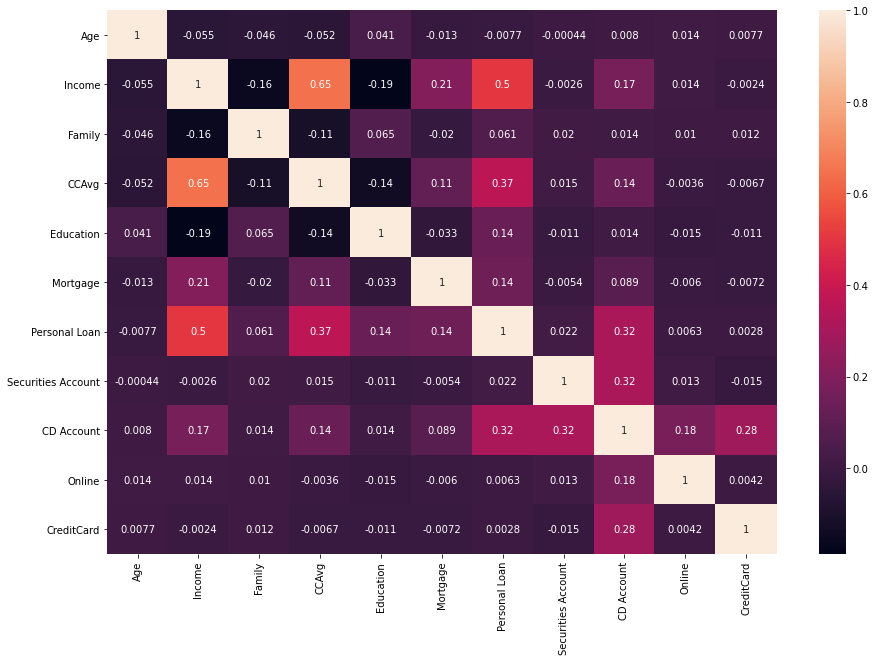

In [45]:
fig, ax = plt.subplots(figsize=(15,10))
corr = df.corr()
print(corr)
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

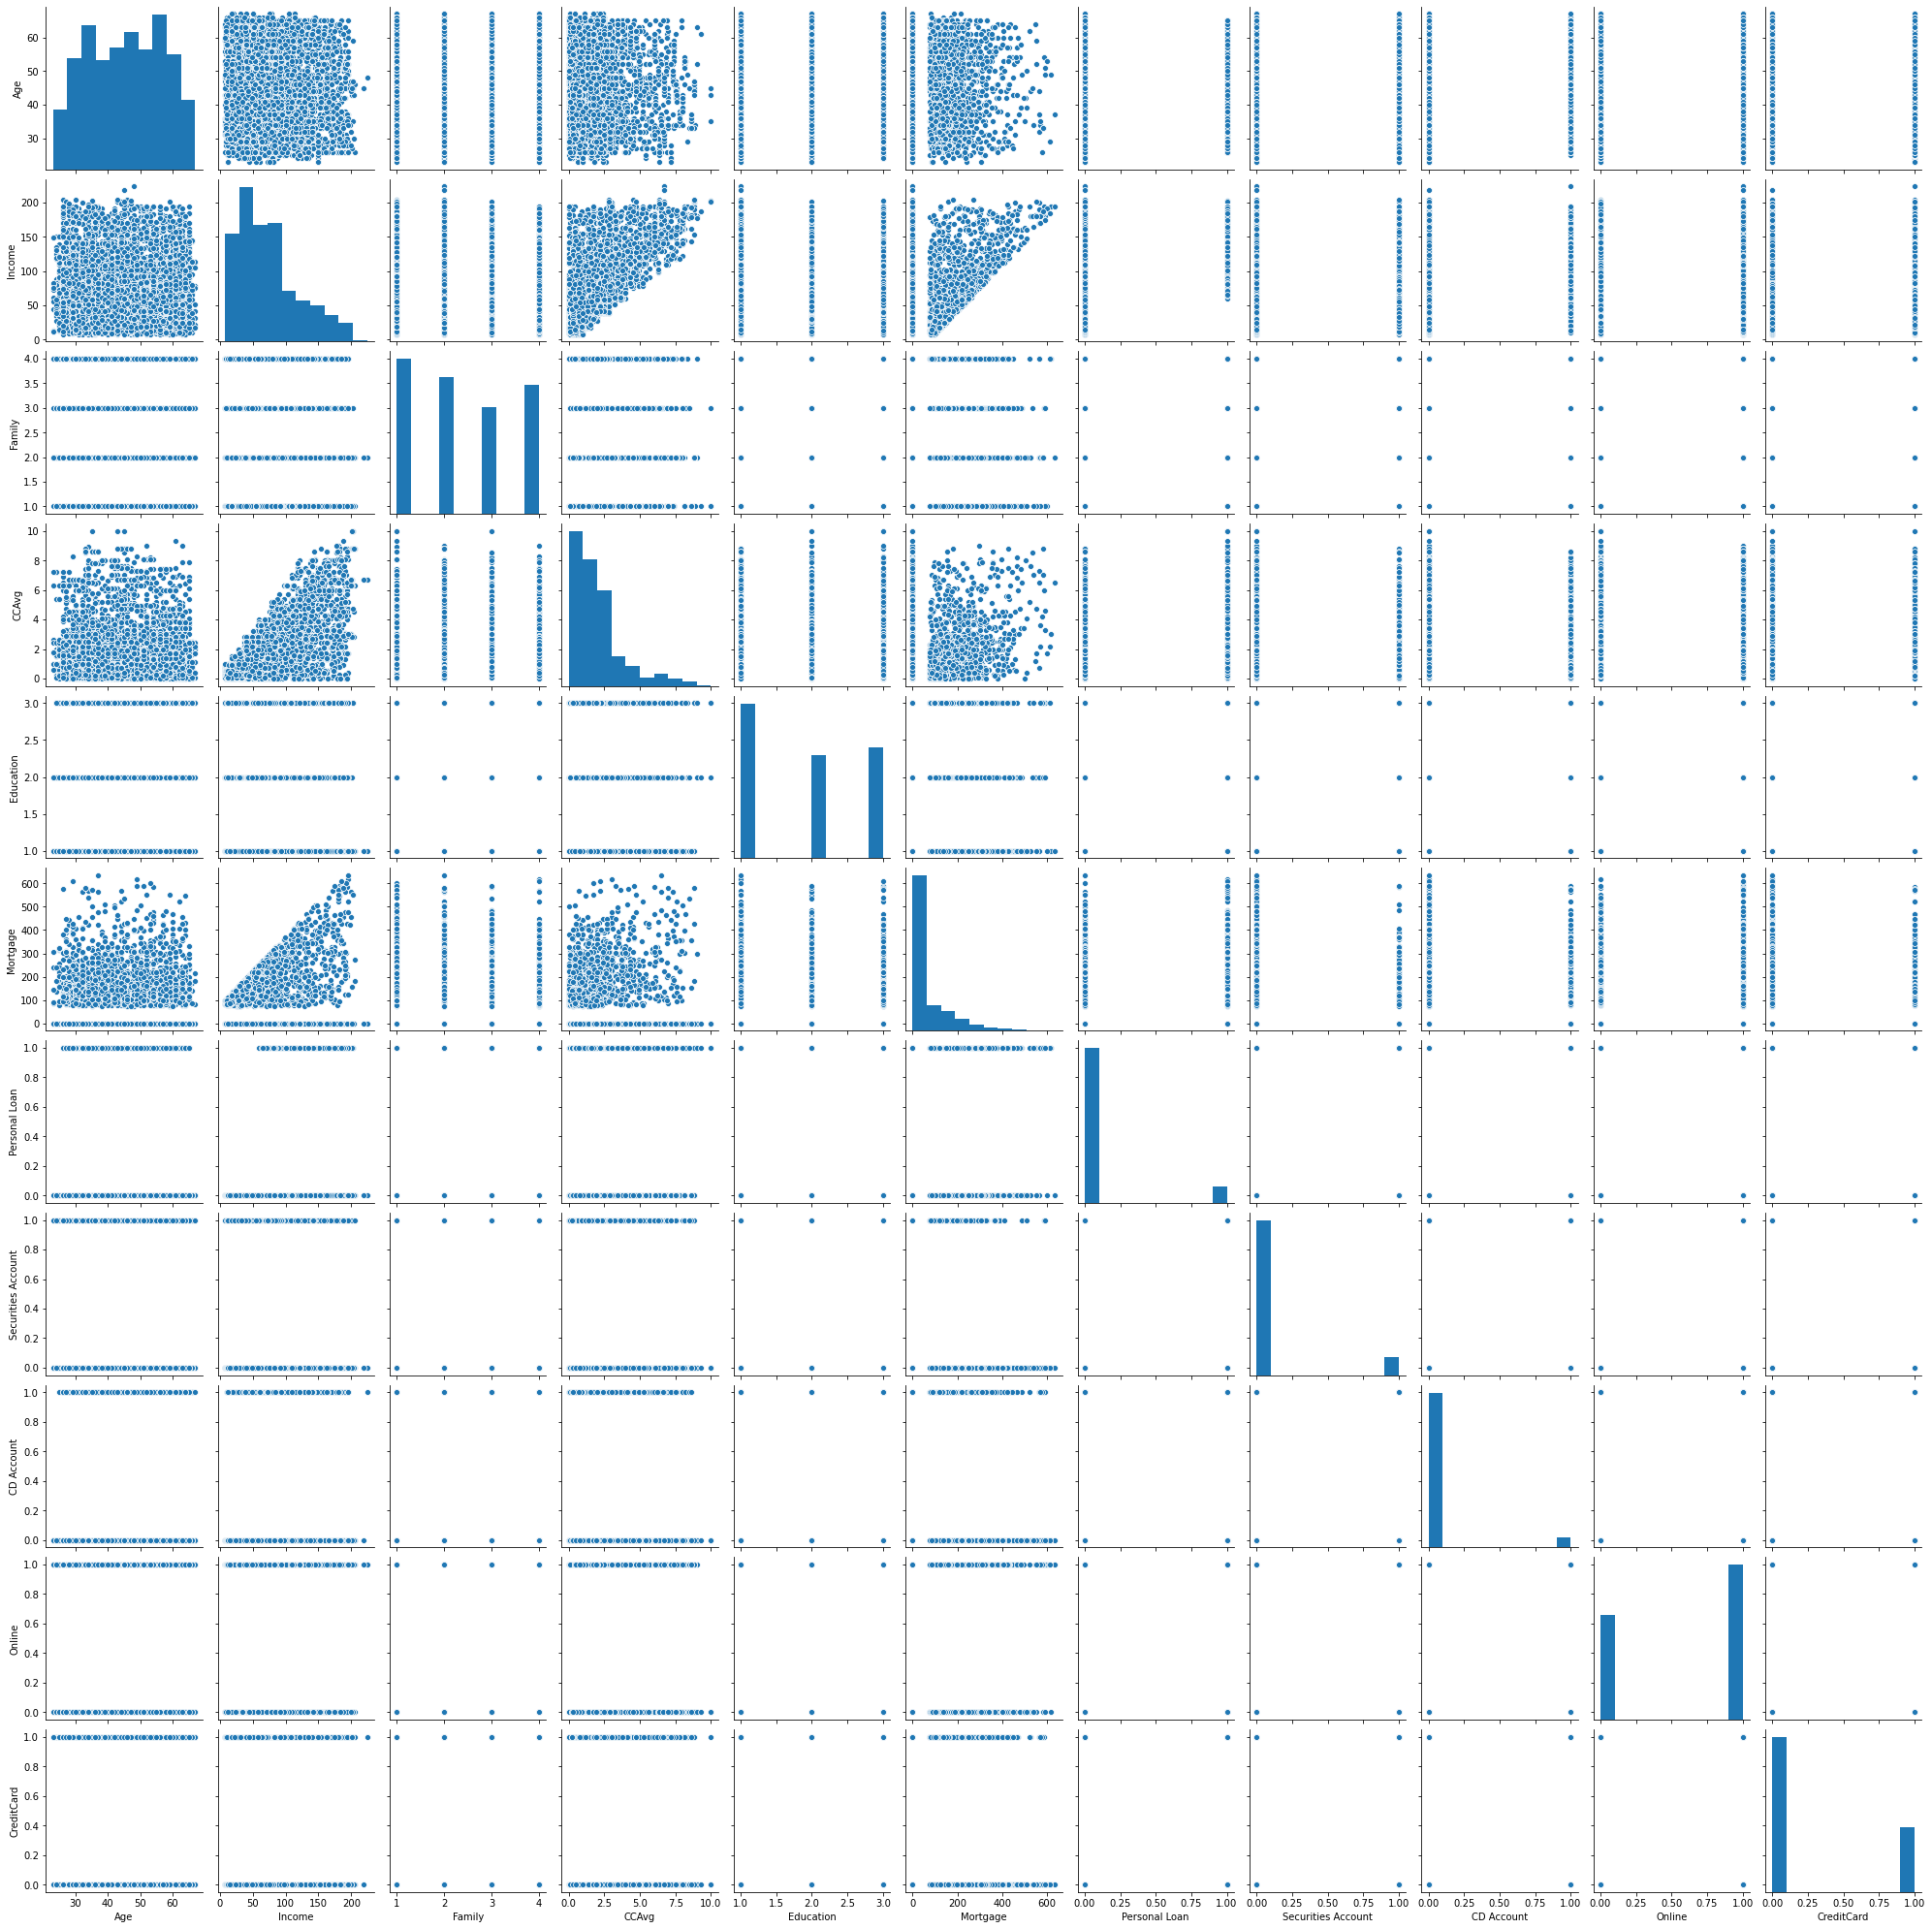

In [46]:
sns.pairplot(df)

### Unique values in each column

In [47]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23])

In [48]:
df['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [49]:
df['Family'].unique()

array([4, 3, 1, 2])

In [50]:
df['CCAvg'].unique()

array([ 1.6       ,  1.5       ,  1.        ,  2.7       ,  0.4       ,
        0.3       ,  0.6       ,  8.9       ,  2.4       ,  0.1       ,
        3.8       ,  2.5       ,  2.        ,  4.7       ,  8.1       ,
        0.5       ,  0.9       ,  1.2       ,  0.7       ,  3.9       ,
        0.2       ,  2.2       ,  3.3       ,  1.8       ,  2.9       ,
        1.4       ,  5.        ,  2.3       ,  1.1       ,  5.7       ,
        4.5       ,  2.1       ,  8.        ,  1.7       ,  0.        ,
        2.8       ,  3.5       ,  4.        ,  2.6       ,  1.3       ,
        5.6       ,  5.2       ,  3.        ,  4.6       ,  3.6       ,
        7.2       ,  1.75      ,  7.4       ,  2.66666667,  7.5       ,
        6.5       ,  7.8       ,  7.9       ,  4.1       ,  1.9       ,
        4.3       ,  6.8       ,  5.1       ,  3.1       ,  0.8       ,
        3.7       ,  6.2       ,  0.75      ,  2.33333333,  4.9       ,
        0.66666667,  3.2       ,  5.5       ,  6.9       ,  4.33

In [51]:
df['Education'].unique()

array([1, 2, 3])

In [52]:
df['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [53]:
df['Personal Loan'].unique()

array([0, 1])

In [54]:
df['Securities Account'].unique()

array([1, 0])

In [55]:
df['CD Account'].unique()

array([0, 1])

In [56]:
df['Online'].unique()

array([0, 1])

In [57]:
df['CreditCard'].unique()

array([0, 1])

In [58]:
X = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

# 4. Transformations of Feature Variables

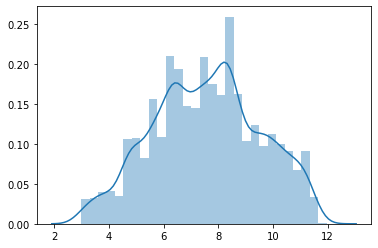

In [59]:
from sklearn.preprocessing import PowerTransformer

pt= PowerTransformer(method= "yeo-johnson", standardize=False)
pt.fit(X['Income'].values.reshape(-1,1))
temp = pt.transform(X["Income"].values.reshape(-1,1))
X["Income"] = pd.Series(temp.flatten())
sns.distplot(temp)

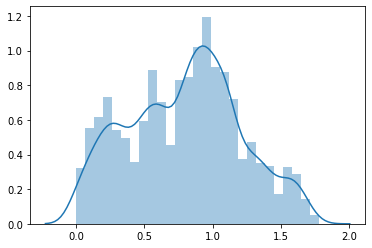

In [60]:
pt= PowerTransformer(method= "yeo-johnson", standardize=False)
pt.fit(X['CCAvg'].values.reshape(-1,1))
temp = pt.transform(X["CCAvg"].values.reshape(-1,1))
X["CCAvg"] = pd.Series(temp.flatten())
sns.distplot(temp)

In [61]:
X['Mortgage_New'] = pd.cut(X['Mortgage'], bins=[0,100,200,300,400,500, 600, 700],
                          labels = [0,1,2,3,4,5,6], include_lowest= True)
X.drop(['Mortgage'], axis= 1, inplace=True)

In [62]:
X.head()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_New
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


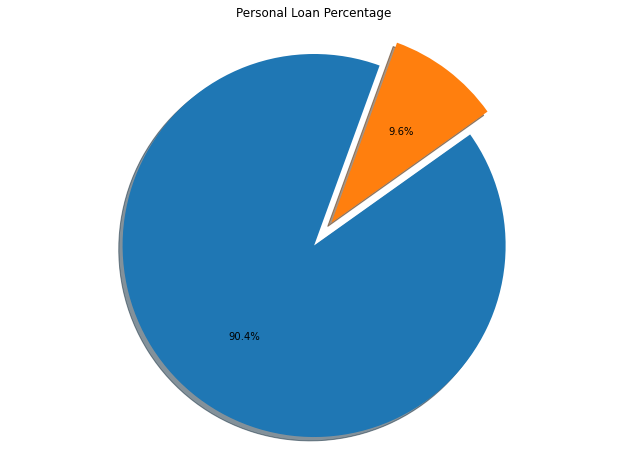

In [63]:
#Around 9.6 percent only gets approved for a personal loan

tempdf = pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
tempdf.columns=['Labels','Personal Loans']
fig1, ax1 = plt.subplots(figsize= (11,8))
explode =(0,0.15)
ax1.pie(tempdf['Personal Loans'], explode= explode, autopct ='%1.1f%%', shadow = True, startangle= 70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

# 5. Splitting into train- test split and standardisation of data

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.3,stratify = y, random_state = 0)

In [66]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [67]:
from sklearn.preprocessing import StandardScaler
for ind, column in enumerate(X_train.columns):
    scalar = StandardScaler()
    
    #fit thr data
    scalar.fit(X_train[[column]])
    
    #transform train data
    scaled_data = scalar.transform(X_train[[column]])
    X_train.loc[:, column] = pd.Series(scaled_data.flatten())
    
    #tranform test data
    scaled_data = scalar.transform(X_test[[column]])
    X_test.loc[:, column] = pd.Series(scaled_data.flatten())

/usr/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [68]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

#converting dataframes into numpy arrays

np_X_train = X_train.values
np_X_test = X_test.values
np_y_train = y_train.values
np_y_test = y_test.values

# 6. Logistic Regression

In [69]:
lg = LogisticRegression(random_state=0)
lg.fit(np_X_train, np_y_train.ravel())
pred_1_test_X = lg.predict(np_X_test)
pred_1_train_X = lg.predict(np_X_train)
acc1_train_X = accuracy_score(np_y_train, pred_1_train_X)
acc1_test_X = accuracy_score(np_y_test, pred_1_test_X)


print("Accuracy on np_X_train : {}".format(acc1_train_X))
print("Accuracy on np_X_test : {}".format(acc1_test_X))

Accuracy on np_X_train : 0.9568571428571429
Accuracy on np_X_test : 0.9546666666666667


# 7. Accuracy and other metrics of Logistic Regression

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
mat = confusion_matrix(np_y_test, pred_1_test_X.reshape(-1,1))
mat

array([[1338,   18],
       [  50,   94]])

Accuracy: 0.9546666666666667


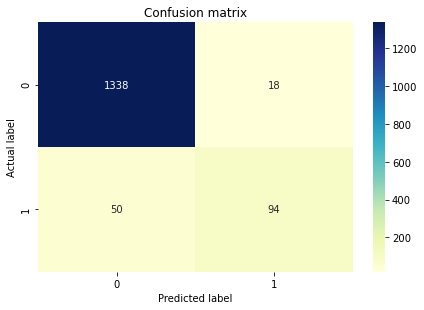

In [80]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(np_y_test, pred_1_test_X.reshape(-1,1)))

In [81]:
TP = mat[0,0]
FP = mat[1,0]
FN = mat[0,1]
TN = mat[1,1]

In [82]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
precision=TP/(TP+FP)
pred_val=TN/(TN+FN)

In [83]:
print("SENSITIVITY : %f"%(sensitivity))
print("SPECIFICITY : %f"%(specificity))
print("PRECISION : %f"%(precision))
print("PREDICTIVE VALUE : %f"%(pred_val))
print()
print("PRECISION SCORE :",metrics.precision_score(np_y_test, pred_1_test_X.reshape(-1,1)))
print("RECALL SCORE :", metrics.recall_score(np_y_test, pred_1_test_X.reshape(-1,1)))
print("F1 SCORE :",metrics.f1_score(np_y_test, pred_1_test_X.reshape(-1,1)))

SENSITIVITY : 0.986726
SPECIFICITY : 0.652778
PRECISION : 0.963977
PREDICTIVE VALUE : 0.839286

PRECISION SCORE : 0.8392857142857143
RECALL SCORE : 0.6527777777777778
F1 SCORE : 0.734375


In [86]:
print("------------Classification Report---------------")
print(classification_report(np_y_test, pred_1_test_X.reshape(-1,1)))

print("\nROC-AUC Score : {}".format(roc_auc_score(np_y_test, pred_1_test_X.reshape(-1,1))))

------------Classification Report---------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.84      0.65      0.73       144

    accuracy                           0.95      1500
   macro avg       0.90      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500


ROC-AUC Score : 0.819751720747296


# 8. Other Models

## Decision Tree

In [87]:
tree = DecisionTreeClassifier(random_state=0, max_depth=8)
tree.fit(np_X_train, np_y_train.ravel())
pred_2_test_X = tree.predict(np_X_test)
pred_2_train_X = tree.predict(np_X_train)
acc2_train_X = accuracy_score(np_y_train, pred_2_train_X)
acc2_test_X = accuracy_score(np_y_test, pred_2_test_X)

print("Accuracy on np_X_train : {}".format(acc2_train_X))
print("Accuracy on np_X_test : {}".format(acc2_test_X))

Accuracy on np_X_train : 0.9957142857142857
Accuracy on np_X_test : 0.9813333333333333


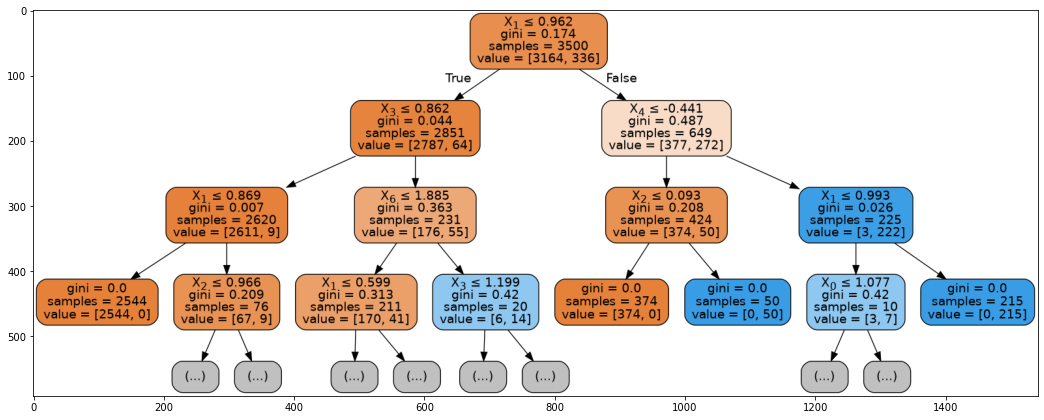

In [88]:
import io
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = io.StringIO()
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, special_characters = True,max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
image = plt.imread('tree.png')
plt.figure(figsize=(18,18))
plt.imshow(image)

## Random Forest Classifier

In [89]:
rf = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=8)
rf.fit(np_X_train, np_y_train.ravel())
pred_3_test_X = rf.predict(np_X_test)
pred_3_train_X = rf.predict(np_X_train)
acc3_train_X = accuracy_score(np_y_train, pred_3_train_X)
acc3_test_X = accuracy_score(np_y_test, pred_3_test_X)

print("Accuracy on np_X_train : {}".format(acc3_train_X))
print("Accuracy on np_X_test : {}".format(acc3_test_X))

Accuracy on np_X_train : 0.9948571428571429
Accuracy on np_X_test : 0.9873333333333333


# Support Vector Machine

In [90]:
from sklearn.svm import SVC
svm = SVC(random_state=0,gamma='auto')

svm.fit(np_X_train, np_y_train.ravel())
pred_4_test_X = svm.predict(np_X_test)
pred_4_train_X = svm.predict(np_X_train)
acc4_train_X = accuracy_score(np_y_train, pred_4_train_X)
acc4_test_X = accuracy_score(np_y_test, pred_4_test_X)

print("Accuracy on np_X_train : {}".format(acc4_train_X))
print("Accuracy on np_X_test : {}".format(acc4_test_X))

Accuracy on np_X_train : 0.9797142857142858
Accuracy on np_X_test : 0.978


# 8.1 Comparison

## Decision Tree

In [91]:
from sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(np_y_test, pred_2_test_X.reshape(-1,1))
mat

array([[1342,   14],
       [  14,  130]])

Accuracy: 0.9813333333333333


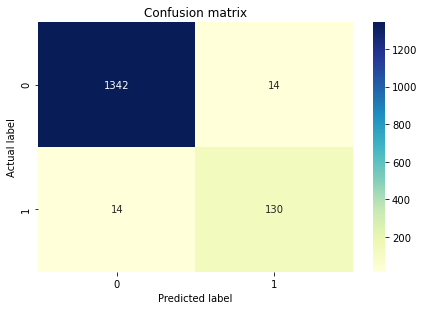

In [92]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(np_y_test, pred_2_test_X.reshape(-1,1)))

In [93]:
TP = mat[0,0]
FP = mat[1,0]
FN = mat[0,1]
TN = mat[1,1]

In [95]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
precision=TP/(TP+FP)
pred_val=TN/(TN+FN)

In [96]:
print("SENSITIVITY : %f"%(sensitivity))
print("SPECIFICITY : %f"%(specificity))
print("PRECISION : %f"%(precision))
print("PREDICTIVE VALUE : %f"%(pred_val))
print()
print("PRECISION SCORE :",metrics.precision_score(np_y_test, pred_2_test_X.reshape(-1,1)))
print("RECALL SCORE :", metrics.recall_score(np_y_test, pred_2_test_X.reshape(-1,1)))
print("F1 SCORE :",metrics.f1_score(np_y_test, pred_2_test_X.reshape(-1,1)))

SENSITIVITY : 0.989676
SPECIFICITY : 0.902778
PRECISION : 0.989676
PREDICTIVE VALUE : 0.902778

PRECISION SCORE : 0.9027777777777778
RECALL SCORE : 0.9027777777777778
F1 SCORE : 0.9027777777777778


In [97]:
print("------------Classification Report---------------")
print(classification_report(np_y_test, pred_2_test_X.reshape(-1,1)))
print("\nROC-AUC Score : {}".format(roc_auc_score(np_y_test, pred_2_test_X.reshape(-1,1))))

------------Classification Report---------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.90      0.90      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500


ROC-AUC Score : 0.9462266470009832


## Random Forest Classifier

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(np_y_test, pred_3_test_X.reshape(-1,1))
mat

array([[1354,    2],
       [  17,  127]])

Accuracy: 0.9873333333333333


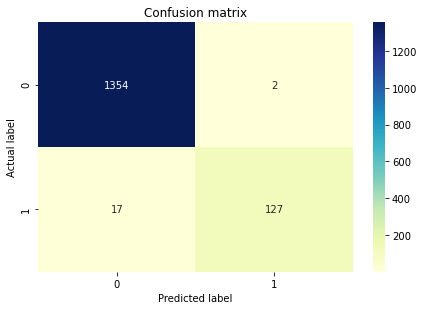

In [99]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(np_y_test, pred_3_test_X.reshape(-1,1)))

In [100]:
TP = mat[0,0]
FP = mat[1,0]
FN = mat[0,1]
TN = mat[1,1]

In [101]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
precision=TP/(TP+FP)
pred_val=TN/(TN+FN)

In [102]:
print("SENSITIVITY : %f"%(sensitivity))
print("SPECIFICITY : %f"%(specificity))
print("PRECISION : %f"%(precision))
print("PREDICTIVE VALUE : %f"%(pred_val))
print()
print("PRECISION SCORE :",metrics.precision_score(np_y_test, pred_3_test_X.reshape(-1,1)))
print("RECALL SCORE :", metrics.recall_score(np_y_test, pred_3_test_X.reshape(-1,1)))
print("F1 SCORE :",metrics.f1_score(np_y_test, pred_3_test_X.reshape(-1,1)))

SENSITIVITY : 0.998525
SPECIFICITY : 0.881944
PRECISION : 0.987600
PREDICTIVE VALUE : 0.984496

PRECISION SCORE : 0.9844961240310077
RECALL SCORE : 0.8819444444444444
F1 SCORE : 0.9304029304029303


In [103]:
print("------------Classification Report---------------")
print(classification_report(np_y_test, pred_3_test_X.reshape(-1,1)))
print("\nROC-AUC Score : {}".format(roc_auc_score(np_y_test, pred_3_test_X.reshape(-1,1))))

------------Classification Report---------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.98      0.88      0.93       144

    accuracy                           0.99      1500
   macro avg       0.99      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500


ROC-AUC Score : 0.9402347590953786


## SVM

In [104]:
from sklearn.metrics import confusion_matrix, classification_report

mat = confusion_matrix(np_y_test, pred_4_test_X.reshape(-1,1))
mat

array([[1351,    5],
       [  28,  116]])

Accuracy: 0.978


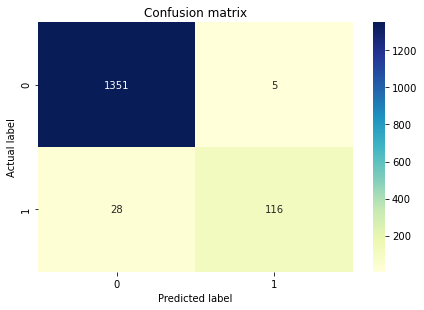

In [105]:
#Ploting the Confusion Matrics
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(np_y_test, pred_4_test_X.reshape(-1,1)))

In [106]:
TP = mat[0,0]
FP = mat[1,0]
FN = mat[0,1]
TN = mat[1,1]

In [107]:
sensitivity=TP/(TP+FN)
specificity=TN/(TN+FP)
precision=TP/(TP+FP)
pred_val=TN/(TN+FN)

In [108]:
print("SENSITIVITY : %f"%(sensitivity))
print("SPECIFICITY : %f"%(specificity))
print("PRECISION : %f"%(precision))
print("PREDICTIVE VALUE : %f"%(pred_val))
print()
print("PRECISION SCORE :",metrics.precision_score(np_y_test, pred_4_test_X.reshape(-1,1)))
print("RECALL SCORE :", metrics.recall_score(np_y_test, pred_4_test_X.reshape(-1,1)))
print("F1 SCORE :",metrics.f1_score(np_y_test, pred_4_test_X.reshape(-1,1)))

SENSITIVITY : 0.996313
SPECIFICITY : 0.805556
PRECISION : 0.979695
PREDICTIVE VALUE : 0.958678

PRECISION SCORE : 0.9586776859504132
RECALL SCORE : 0.8055555555555556
F1 SCORE : 0.8754716981132076


In [109]:
print("------------Classification Report---------------")
print(classification_report(np_y_test, pred_4_test_X.reshape(-1,1)))
print("\nROC-AUC Score : {}".format(roc_auc_score(np_y_test, pred_4_test_X.reshape(-1,1))))

------------Classification Report---------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.96      0.81      0.88       144

    accuracy                           0.98      1500
   macro avg       0.97      0.90      0.93      1500
weighted avg       0.98      0.98      0.98      1500


ROC-AUC Score : 0.9009341199606686


# 9. Business Understanding

The data of 5000 customers were given to us. We first cleaned the dataset. Then applied the following models:

Logistic Regression
Decision Tree
Random Forest Classifier
SVM


We found that Random Forest and Decision tree is observed to have more accuracy.

Mortgage, Income and Credit card average data is skewed highly.

Many people have low average credit card spending per month.



Project done by **Divya Ann Kurien**